# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 4, figsize=(15, 6))
perplexities = [30, 50, 80, 100, 150, 200, 250]

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

In [3]:
# 繪製資料原圖
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

S-Curve, perplexity=30 in 6.3 sec
S-Curve, perplexity=50 in 7 sec
S-Curve, perplexity=80 in 7.6 sec
S-Curve, perplexity=100 in 11 sec
S-Curve, perplexity=150 in 9.3 sec
S-Curve, perplexity=200 in 9.4 sec
S-Curve, perplexity=250 in 9.1 sec


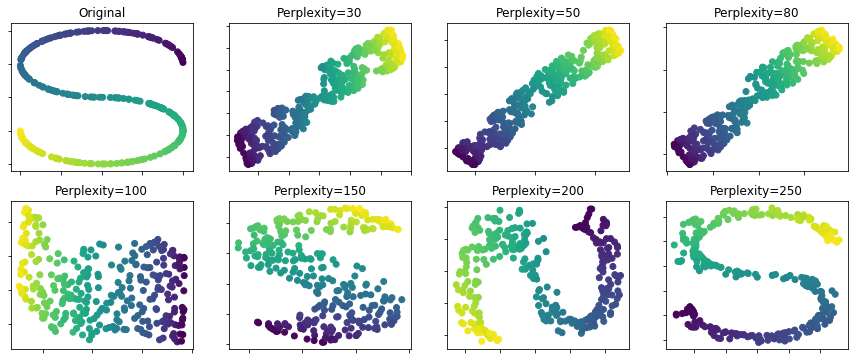

In [4]:
# 繪製不同 perplexity 下的 t-SNE 分群圖 (請注意! 語法也要對應調整)
for i, perplexity in enumerate(perplexities):
    if i<3:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-3]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-Curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()